**Contexto:**
O Combine é um evento realizado todos os anos no meio do Futebol Americano. Neste evento, jogadores de diversas posições e universidades são chamados para realização de exames e testes físicos para que os profissionais da NFL avaliem os atletas universitários

Tabela retirada do site: https://www.pro-football-reference.com/draft/2022-combine.htm

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# carregando arquivo
url = 'https://www.pro-football-reference.com/draft/2022-combine.htm#combine'
tabela = pd.read_html(url)
df = tabela[0]

In [54]:
# visualizando o arquivo
df.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Cal Adomitis,LS,Pittsburgh,College Stats,6-2,235,4.97,29.5,18,107,7.53,4.62,NaN
1,Austin Allen,TE,Nebraska,College Stats,6-8,253,4.83,34.0,NaN,121,7.00,4.26,NaN
2,Chase Allen,TE,Iowa St.,College Stats,6-6,251,NaN,33.5,NaN,117,7.03,4.43,NaN
3,Christopher Allen,EDGE,Alabama,College Stats,6-4,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tyler Allgeier,RB,BYU,College Stats,5-11,224,4.60,33.0,NaN,120,NaN,NaN,Atlanta Falcons / 5th / 151st pick / 2022


## **Tratando os dados**

In [55]:
# trocando os NaN da coluna
df['Drafted (tm/rnd/yr)'].fillna('0 / 0 / 0 / 0', inplace=True)

In [56]:
# separando a coluna em 4 novas colunas
df[['Team', 'Round', 'Pick', 'Year']] = df['Drafted (tm/rnd/yr)'].str.split(' / ', expand = True)

In [57]:
# retirando os caracteres, deixando apenas o número do Round
df['Round'] = df['Round'].str.replace('[th,st,rd,nd]', '', regex=True)

In [58]:
# retirando os caracteres, deixando apenas o número da Pick
df['Pick'] = df['Pick'].str.replace('[st pick, th pick, nd, rd]', '', regex=True)

In [59]:
# dropando a coluna que foi separada
df.drop(['Drafted (tm/rnd/yr)'], axis=1, inplace=True)

In [60]:
# convertendo a coluna de peso que estava em pounds para kg
df['Wt'] = df['Wt'].apply(pd.to_numeric, downcast='float', errors='coerce')
df['Wt'] = df['Wt'] * 0.453592

In [61]:
# visualizando o novo arquivo
df.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Team,Round,Pick,Year
0,Cal Adomitis,LS,Pittsburgh,College Stats,6-2,106.594124,4.97,29.5,18,107,7.53,4.62,0,0,0,0
1,Austin Allen,TE,Nebraska,College Stats,6-8,114.758774,4.83,34.0,NaN,121,7.00,4.26,0,0,0,0
2,Chase Allen,TE,Iowa St.,College Stats,6-6,113.851593,NaN,33.5,NaN,117,7.03,4.43,0,0,0,0
3,Christopher Allen,EDGE,Alabama,College Stats,6-4,109.315674,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,Tyler Allgeier,RB,BYU,College Stats,5-11,101.604607,4.60,33.0,NaN,120,NaN,NaN,Atlanta Falcons,5,151,2022


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      330 non-null    object 
 1   Pos         330 non-null    object 
 2   School      330 non-null    object 
 3   College     305 non-null    object 
 4   Ht          330 non-null    object 
 5   Wt          324 non-null    float32
 6   40yd        241 non-null    object 
 7   Vertical    229 non-null    object 
 8   Bench       79 non-null     object 
 9   Broad Jump  224 non-null    object 
 10  3Cone       98 non-null     object 
 11  Shuttle     107 non-null    object 
 12  Team        330 non-null    object 
 13  Round       324 non-null    object 
 14  Pick        324 non-null    object 
 15  Year        324 non-null    object 
dtypes: float32(1), object(15)
memory usage: 40.1+ KB


In [63]:
# dropando uma linha com informações erradas
df.drop(df[df['40yd'] == '40yd'].index, inplace=True)

In [64]:
# convertendo os tipos das colunas numéricas
df[['40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']] = df[['40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']].apply(pd.to_numeric)
print(df.dtypes)

Player         object
Pos            object
School         object
College        object
Ht             object
Wt            float32
40yd          float64
Vertical      float64
Bench         float64
Broad Jump    float64
3Cone         float64
Shuttle       float64
Team           object
Round          object
Pick           object
Year           object
dtype: object


## **Visualizando os dados**

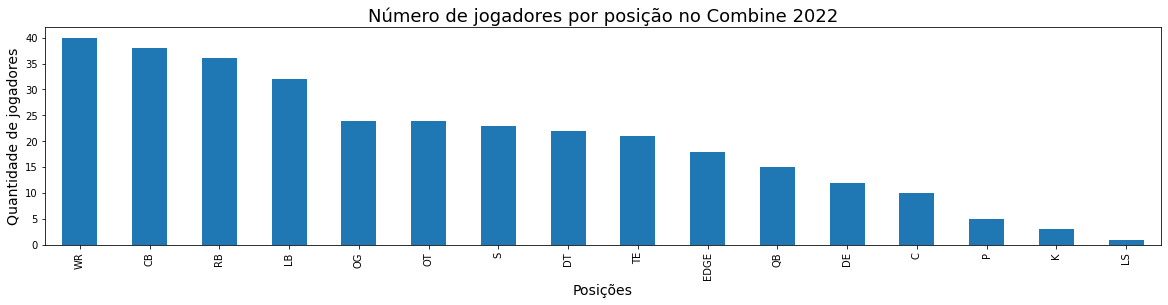

In [65]:
ax = df['Pos'].value_counts().plot(kind='bar', figsize=(20,4))
ax.set_title('Número de jogadores por posição no Combine 2022', fontsize=18)
ax.set_xlabel('Posições', fontsize=14)
ax.set_ylabel('Quantidade de jogadores', fontsize=14)
plt.show()

Jogadores variados de diversas posições, bem distribuidos entre jogadores de ataque e defesa, porém com baixo número de jogadores de Special Teams (P, K, LS)

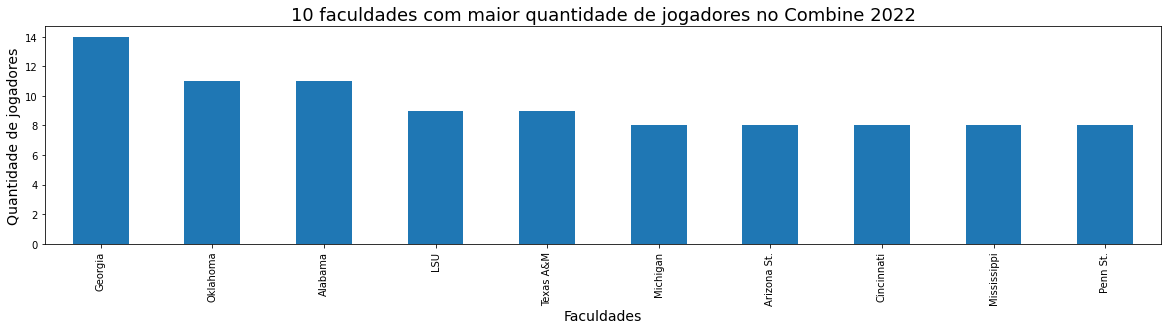

In [66]:
ax = df['School'].value_counts()[:10].plot(kind='bar', figsize=(20,4))
ax.set_title('10 faculdades com maior quantidade de jogadores no Combine 2022', fontsize=18)
ax.set_xlabel('Faculdades', fontsize=14)
ax.set_ylabel('Quantidade de jogadores', fontsize=14)
plt.show()

A final do College 21-22 foi entre Georgia e Alabama, duas das maiores faculdades com jogadores no Combine. Além disso, as semifinais também tiveram Michigan e Cincinnati, que também estão no top 10

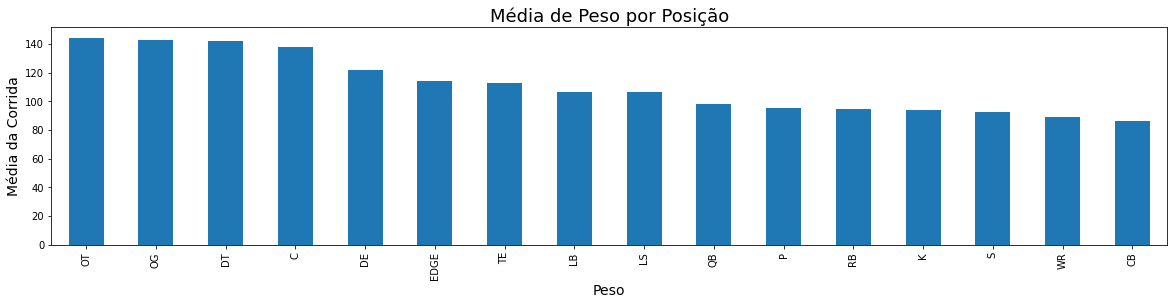

In [67]:
ax = df.groupby('Pos')['Wt'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,4))
ax.set_title('Média de Peso por Posição', fontsize=18)
ax.set_xlabel('Peso', fontsize=14)
ax.set_ylabel('Média da Corrida', fontsize=14)
plt.show()

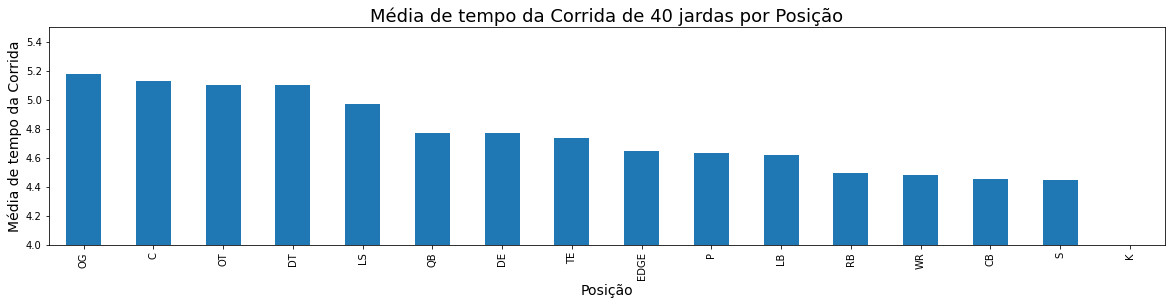

In [68]:
ax = df.groupby('Pos')['40yd'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,4))
ax.set_title('Média de tempo da Corrida de 40 jardas por Posição', fontsize=18)
ax.set_xlabel('Posição', fontsize=14)
ax.set_ylabel('Média de tempo da Corrida', fontsize=14)
plt.ylim(4,5.5)
plt.show()

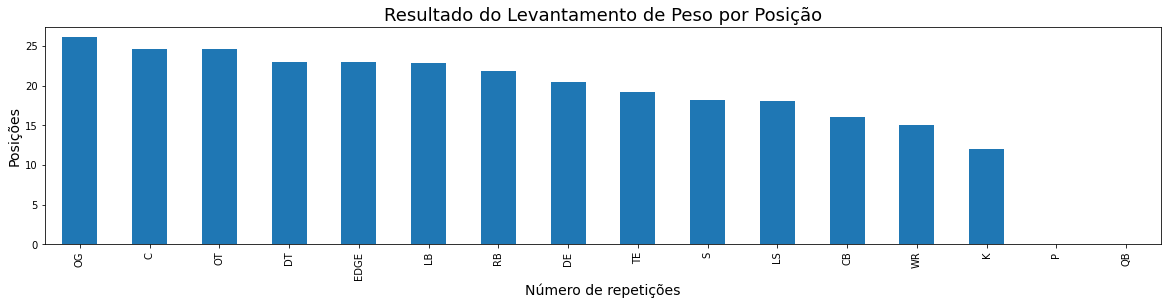

In [69]:
ax = df.groupby('Pos')['Bench'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,4))
ax.set_title('Resultado do Levantamento de Peso por Posição', fontsize=18)
ax.set_xlabel('Número de repetições', fontsize=14)
ax.set_ylabel('Posições', fontsize=14)
plt.show()

Como esperado, os jogadores com menor média de peso tiveram desempenho melhor na corrida de 40 jardas, enquanto os com maior média de peso tiveram desempenho melhor no levantamento de peso

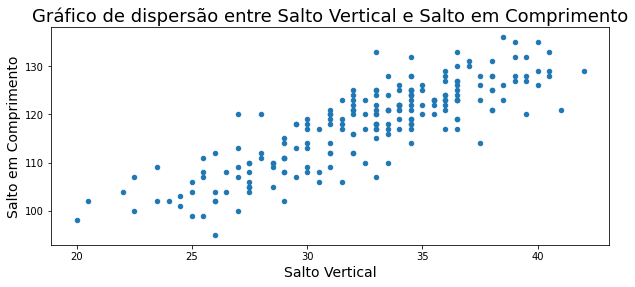

In [70]:
ax = df.plot(kind='scatter', x='Vertical', y='Broad Jump', figsize=(10,4))
ax.set_title('Gráfico de dispersão entre Salto Vertical e Salto em Comprimento', fontsize=18)
ax.set_xlabel('Salto Vertical', fontsize=14)
ax.set_ylabel('Salto em Comprimento', fontsize=14)
plt.show()

Verificando a relação entre o salto vertical e o salto em comprimento, aparentemente mostrando uma associação entre as duas variáveis

## Analisando os Defensive Ends

Uma das posições mais importantes na NFL hoje são os defensive ends. De acordo com Cynthia Frelund (NFL Network Analytics Expert)¹, alguns resultados de exercícios relevantes são:
*   Peso: Entre 117 e 129 em kg

*   Vertical: Entre 30 e 34.4 em inches

*   Broad Jump: Pelo menos 110 em inches

*   Shuttle: Entre 4.29 e 4.45 em segundos

¹https://www.nfl.com/news/what-to-watch-for-at-2022-nfl-scouting-combine

In [71]:
defensive_end = df.loc[(df['Pos'] == 'DE') | (df['Pos'] == 'EDGE')]

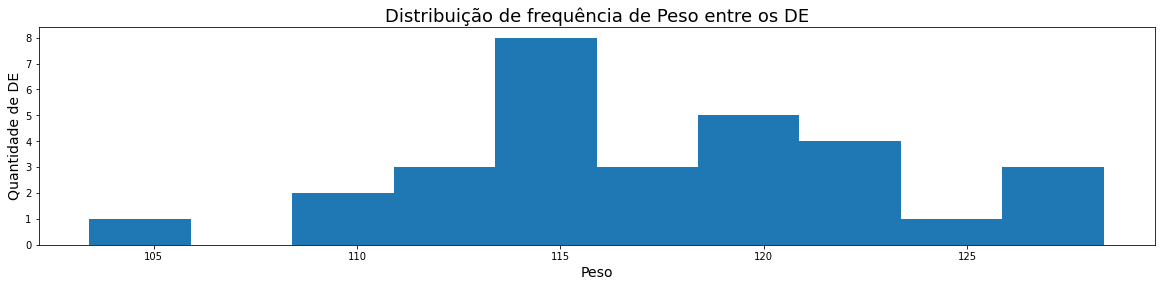

In [72]:
ax = defensive_end['Wt'].plot(kind='hist', figsize=(20,4))
ax.set_title('Distribuição de frequência de Peso entre os DE', fontsize=18)
ax.set_xlabel('Peso', fontsize=14)
ax.set_ylabel('Quantidade de DE', fontsize=14)
plt.show()

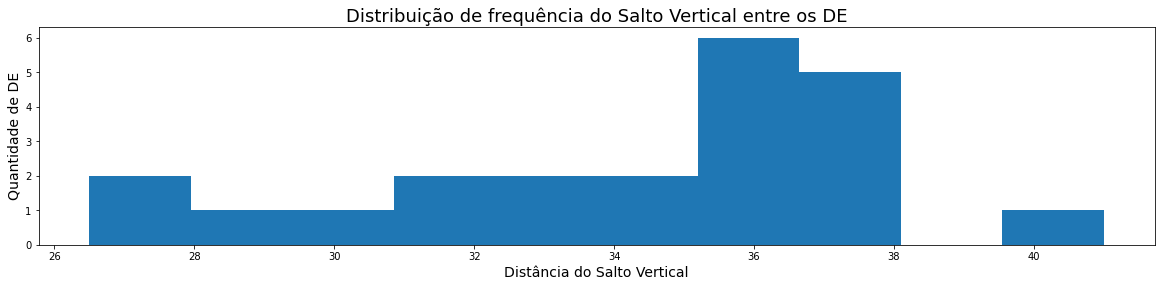

In [73]:
ax = defensive_end['Vertical'].plot(kind='hist', figsize=(20,4))
ax.set_title('Distribuição de frequência do Salto Vertical entre os DE', fontsize=18)
ax.set_xlabel('Distância do Salto Vertical', fontsize=14)
ax.set_ylabel('Quantidade de DE', fontsize=14)
plt.show()

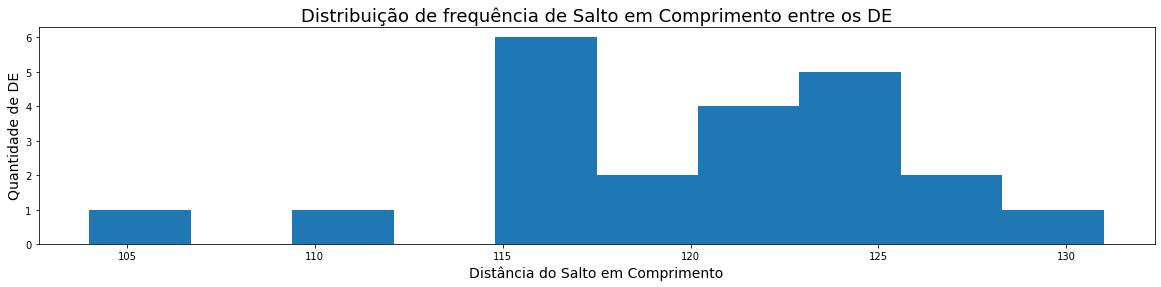

In [74]:
ax = defensive_end['Broad Jump'].plot(kind='hist', figsize=(20,4))
ax.set_title('Distribuição de frequência de Salto em Comprimento entre os DE', fontsize=18)
ax.set_xlabel('Distância do Salto em Comprimento', fontsize=14)
ax.set_ylabel('Quantidade de DE', fontsize=14)
plt.show()

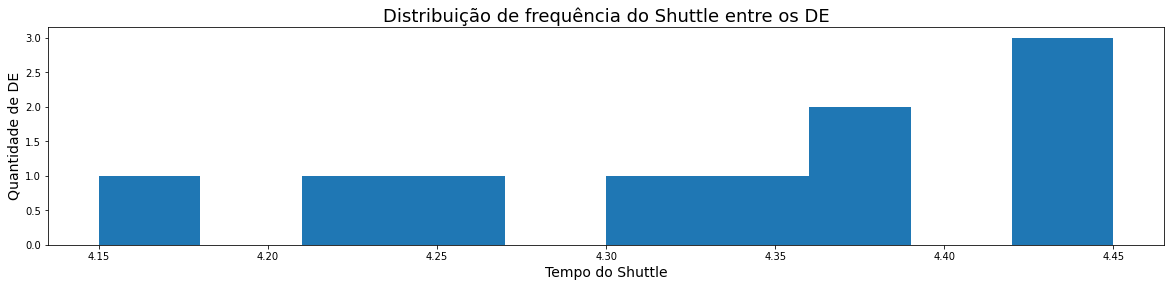

In [75]:
ax = defensive_end['Shuttle'].plot(kind='hist', figsize=(20,4))
ax.set_title('Distribuição de frequência do Shuttle entre os DE', fontsize=18)
ax.set_xlabel('Tempo do Shuttle', fontsize=14)
ax.set_ylabel('Quantidade de DE', fontsize=14)
plt.show()

Com a visualização dos histogramas, pode-se visualizar que todos os testes físicos a grande maioria dos atletas obtiveram um desempenho esperado ou até acima do esperado. Porém, na pesagem, a maior parte dos atletas ainda não está no peso ideal

Verificando se o Peso dos atletas influenciou no round em que foi draftado:

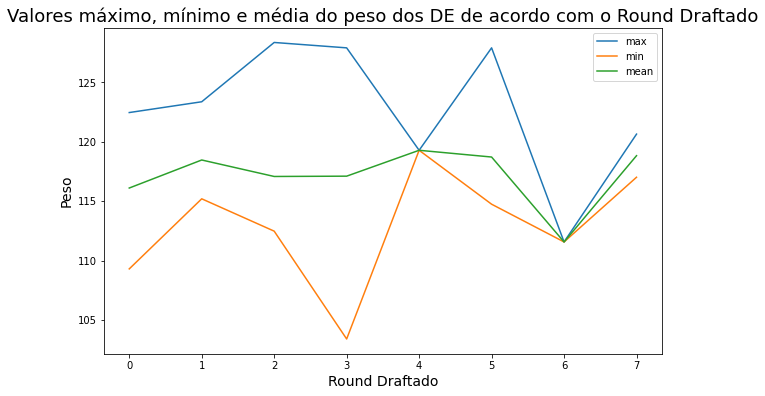

In [76]:
ax = defensive_end.groupby('Round')['Wt'].agg(['max', 'min', 'mean']).plot(figsize=(10,6))
ax.set_title('Valores máximo, mínimo e média do peso dos DE de acordo com o Round Draftado', fontsize=18)
ax.set_xlabel('Round Draftado', fontsize=14)
ax.set_ylabel('Peso', fontsize=14)
plt.show()

Aparentemente o fator Peso apenas não influencia o Round que o atleta será draftado

**Pelo fato do Combine convidar apenas alguns atletas e outros decidirem não participar, a quantidade de dados é baixa. Além disso, existem algumas posições que não tem necessidade de realizar alguns tipos de testes. Portanto, a análise pode não ser tão precisa. Uma ideia futura seria realizar a análise de diversos anos para obter mais dados para explorar**